In [1]:
# Import everything
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
employee_data =pd.read_table('Employee_data.txt',sep=",")
employee_data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(employee_data.drop('TARGET CLASS', axis=1))
sc_transform = scaler.transform(employee_data.drop('TARGET CLASS', axis=1))
sc_df = pd.DataFrame(sc_transform)

# Now you can safely use sc_df as your input features.
sc_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [8]:
from sklearn.model_selection import train_test_split

X = sc_transform
y = employee_data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Text(0, 0.5, 'Error Rate')

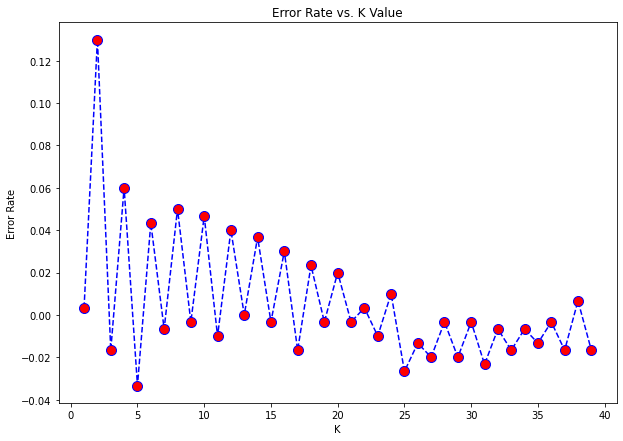

In [31]:
# Initialize an array that stores the error rates.
from sklearn.neighbors import KNeighborsClassifier

error_rates = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'minkowski', p=2)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test - preds))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [28]:
k = 28
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[131  22]
 [ 21 126]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       153
           1       0.85      0.86      0.85       147

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [ ]:
#Cosine distance - This metric is widely used in text mining, natural language processing, and information retrieval systems.
#Minkowski Distance - It is a generalization of the Euclidean and Manhattan distance measures and adds a parameter, called the “order” or “p“, that allows different distance measures to be calculated.
    #p=1: Manhattan distance.
    #p=2: Euclidean distance.
#Hamming - Hamming distance calculates the distance between two binary vectors, also referred to as binary strings or bitstrings for short. You are most likely going to encounter bitstrings when you one-hot encode categorical columns of data.
#Euclidean distance - You are most likely to use Euclidean distance when calculating the distance between two rows of data that have numerical values, such a floating point or integer values.
